# Time Series Analysis using RNN on Microsoft Stock

In [133]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
microsoft_data = pd.read_csv("MicrosoftStock.csv")
microsoft_data

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [3]:
microsoft_data.dropna(inplace=True)

In [4]:
# Parse dates and set the index
microsoft_data['Date'] = pd.to_datetime(microsoft_data['Date'])
microsoft_data.set_index('Date', inplace=True)

# Select the 'Close' price for analysis
time_series_data = microsoft_data['Close']

In [201]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data.values.reshape(-1, 1))

# Create sequences for the RNN models
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])  # X will contain sequences of data
        y.append(data[i + sequence_length])    # y will be the next value after the sequence
    return np.array(X), np.array(y)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets (fixed random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

callbacks = [early_stopping, reduce_lr]

In [203]:
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
# Train RNN
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), 
callbacks=callbacks)

Epoch 1/50


C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0623 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - val_loss: 1.7409e-04 - learning_rate: 0.0010
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7929e-04 - val_loss: 1.5862e-04 - learning_rate: 0.0010
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5017e-04 - val_loss: 1.6500e-04 - learning_rate: 0.0010
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5701e-04 - val_loss: 1.5309e-04 - learning_rate: 5.0000e-04
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4155e-04 - val_loss: 1.8052e-04 - learning_rate: 5.0000e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0394e-04 - val_loss: 1.5525e-04 - learning_rate: 2.5000e-04
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9846e-04 - val_loss: 1.5777e-04 - learning_rate: 2.5000e-04


In [204]:
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), 
    callbacks=callbacks)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1385 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017 - val_loss: 2.8709e-04 - learning_rate: 0.0010
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7959e-04 - val_loss: 2.1068e-04 - learning_rate: 0.0010


In [205]:
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), 
    callbacks=callbacks)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1122 - val_loss: 0.0207 - learning_rate: 0.0010
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0168 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0054 - val_loss: 0.0013 - learning_rate: 0.0010


In [206]:
rnn_loss = rnn_history.history['loss']
rnn_val_loss = rnn_history.history['val_loss']

lstm_loss = lstm_history.history['loss']
lstm_val_loss = lstm_history.history['val_loss']

gru_loss = gru_history.history['loss']
gru_val_loss = gru_history.history['val_loss']

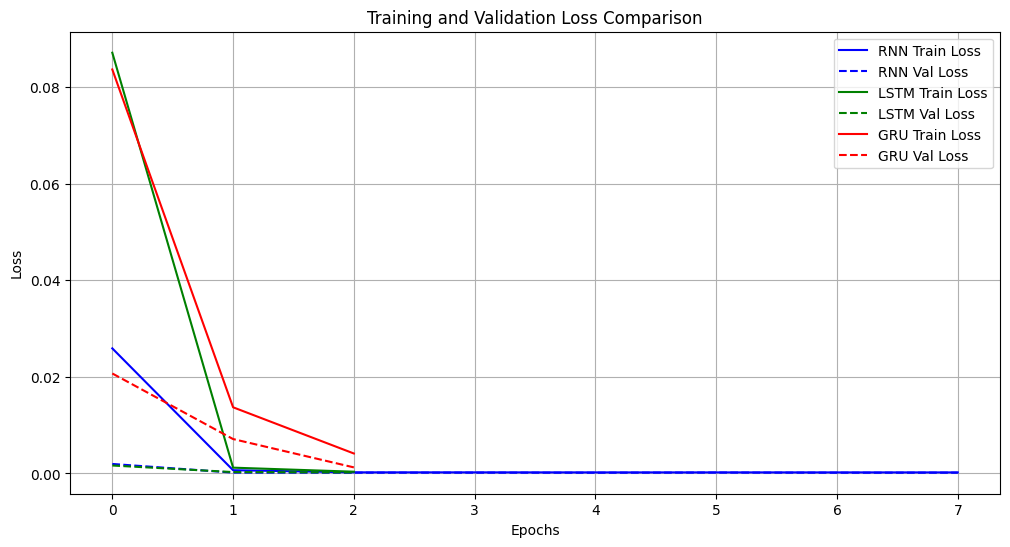

In [207]:
# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(rnn_loss, label='RNN Train Loss', color='blue')
plt.plot(rnn_val_loss, label='RNN Val Loss', linestyle='--', color='blue')

plt.plot(lstm_loss, label='LSTM Train Loss', color='green')
plt.plot(lstm_val_loss, label='LSTM Val Loss', linestyle='--', color='green')

plt.plot(gru_loss, label='GRU Train Loss', color='red')
plt.plot(gru_val_loss, label='GRU Val Loss', linestyle='--', color='red')

# Add titles and labels
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


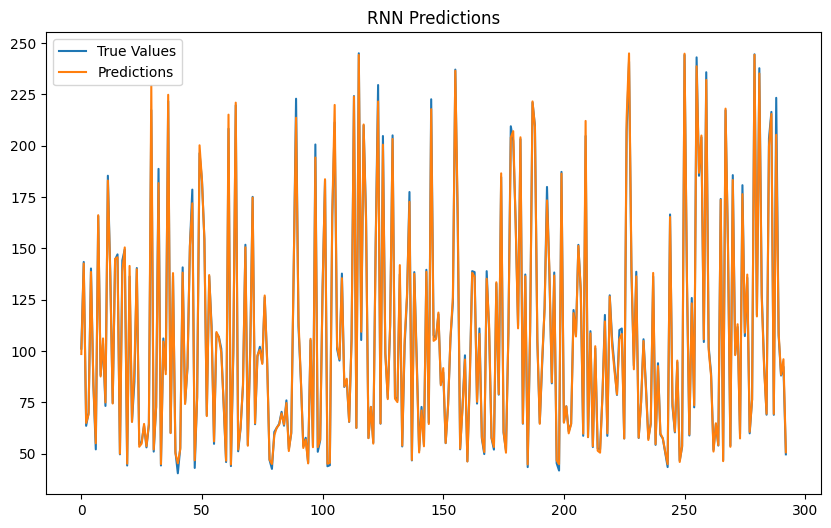

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


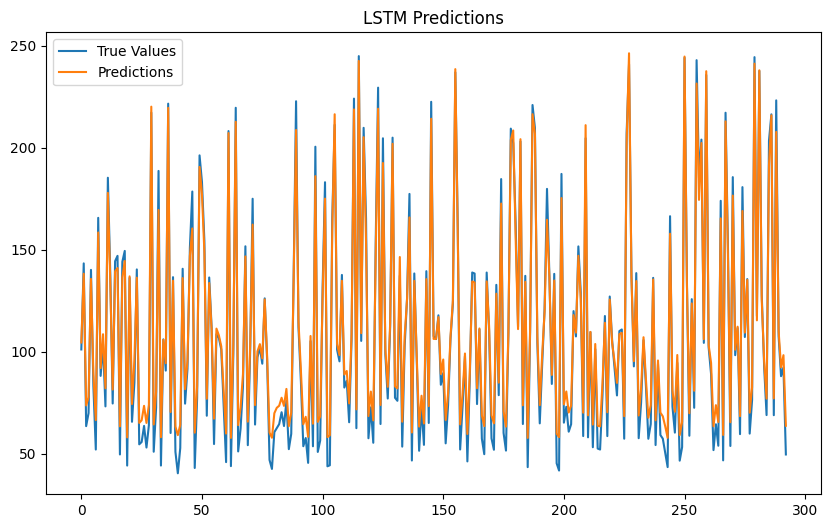

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


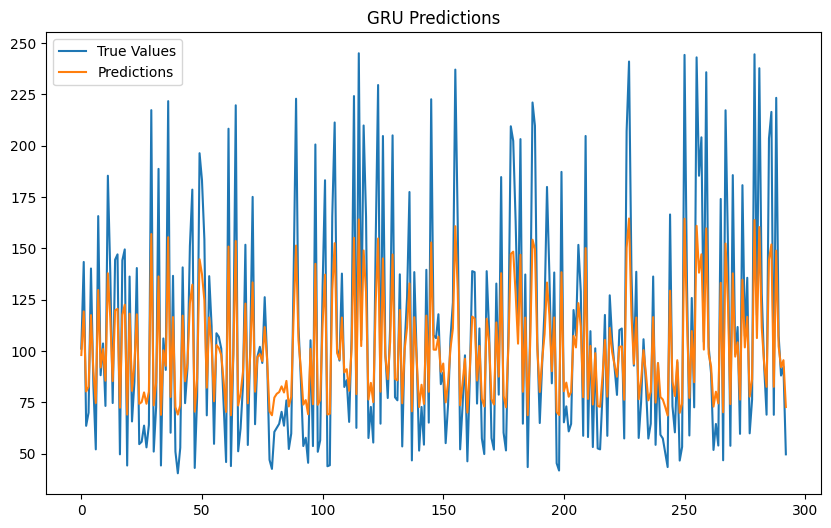

In [208]:
def plot_predictions(model, X_test, y_test, title):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='True Values')
    plt.plot(predictions, label='Predictions')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot predictions for each model
plot_predictions(rnn_model, X_test, y_test, 'RNN Predictions')
plot_predictions(lstm_model, X_test, y_test, 'LSTM Predictions')
plot_predictions(gru_model, X_test, y_test, 'GRU Predictions')

In [209]:
rnn_mse = mean_squared_error(y_test, rnn_model.predict(X_test))
lstm_mse = mean_squared_error(y_test, lstm_model.predict(X_test))
gru_mse = mean_squared_error(y_test, gru_model.predict(X_test))

print(f"RNN MSE: {rnn_mse}")
print(f"LSTM MSE: {lstm_mse}")
print(f"GRU MSE: {gru_mse}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RNN MSE: 0.00015308681036054676
LSTM MSE: 0.0016450395996436386
GRU MSE: 0.020705723169756447


In [210]:
# Get predictions and inverse transform to original scale
rnn_predictions = scaler.inverse_transform(rnn_model.predict(X_test))
lstm_predictions = scaler.inverse_transform(lstm_model.predict(X_test))
gru_predictions = scaler.inverse_transform(gru_model.predict(X_test))
y_true = scaler.inverse_transform(y_test)

# Calculate R²
rnn_r2 = r2_score(y_true, rnn_predictions)
lstm_r2 = r2_score(y_true, lstm_predictions)
gru_r2 = r2_score(y_true, gru_predictions)

print(f"RNN R²: {rnn_r2}")
print(f"LSTM R²: {lstm_r2}")
print(f"GRU R²: {gru_r2}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RNN R²: 0.9978629037464618
LSTM R²: 0.9770351957135406
GRU R²: 0.7109474453370681


# Time Series Analysis using RNN on Room Temperature Data

In [213]:
room_data = pd.read_csv("MLTempDataset.csv")
room_data

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00
...,...,...,...,...
6671,6671,19,27.350,2022-10-08 23:00:00
6672,6672,20,26.800,2022-10-09 00:00:00
6673,6673,21,26.450,2022-10-09 01:00:00
6674,6674,22,25.900,2022-10-09 02:00:00


In [215]:
# Drop the unnecessary columns
room_data.drop(columns=['Unnamed: 0', 'Datetime'], inplace=True)

# Convert 'Datetime1' to datetime format
room_data['Datetime1'] = pd.to_datetime(room_data['Datetime1'])

# Set 'Datetime1' as the index
room_data.set_index('Datetime1', inplace=True)

# Display the cleaned data
room_data.head()

,DAYTON_MW
Datetime1,
1970-01-01 00:00:00.000000000,20.867
1970-01-01 00:00:00.000000001,21.000
1970-01-01 00:00:00.000000002,20.867
1970-01-01 00:00:00.000000003,20.650
1970-01-01 00:00:00.000000004,20.400


In [217]:
# Extract the 'DAYTON_MW' column as the target variable
temperature_data = room_data['DAYTON_MW'].dropna()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_data.values.reshape(-1, 1))

# Create sequences for time-series forecasting
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

In [219]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (5300, 50, 1)
y_train shape: (5300, 1)


In [234]:
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [241]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20


C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1791 - val_loss: 0.0125
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - val_loss: 0.0103
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - val_loss: 0.0085


In [242]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1967 - val_loss: 0.0236
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0222 - val_loss: 0.0141
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0156 - val_loss: 0.0134
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0113 - val_loss: 0.0127
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0110 - val_loss: 0.0085


In [243]:
# GRU Model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Train the model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1327 - val_loss: 0.0142
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0132 - val_loss: 0.0112
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - val_loss: 0.0082


In [244]:
# Evaluate the models
rnn_score = rnn_model.evaluate(X_test, y_test)
lstm_score = lstm_model.evaluate(X_test, y_test)
gru_score = gru_model.evaluate(X_test, y_test)

# Print the evaluation scores
print(f"RNN Test Loss: {rnn_score}")
print(f"LSTM Test Loss: {lstm_score}")
print(f"GRU Test Loss: {gru_score}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078
RNN Test Loss: 0.008542252704501152
LSTM Test Loss: 0.008470538072288036
GRU Test Loss: 0.008225079625844955


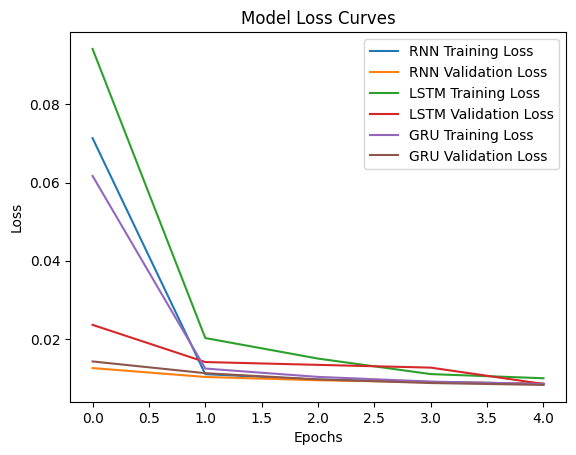

In [245]:
# Plot loss curves
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Curves')
plt.show()

In [246]:
# Predict on test data
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Calculate R² score for each model
rnn_r2 = r2_score(y_test, rnn_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
gru_r2 = r2_score(y_test, gru_predictions)

# Print R² scores
print(f"RNN R²: {rnn_r2}")
print(f"LSTM R²: {lstm_r2}")
print(f"GRU R²: {gru_r2}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RNN R²: 0.8175416998753187
LSTM R²: 0.819073506345455
GRU R²: 0.8243163341301735
